In [1]:
!pip install tensorflow

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 103.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [3]:
from ultralytics import YOLO

# Cek versi
import ultralytics
ultralytics.checks()

Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.5/112.6 GB disk)


In [4]:
from google.colab import files
files.upload()  # upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mochyusufhaidar","key":"9529559981a140f13f52dae33420641e"}'}

In [5]:
# Buat folder dan copy token
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Unduh dataset
!kaggle datasets download -d mochyusufhaidar/dataset-sampah

# Ekstrak
!unzip -q dataset-sampah.zip -d dataset

Dataset URL: https://www.kaggle.com/datasets/mochyusufhaidar/dataset-sampah
License(s): unknown
 96% 630M/654M [00:01<00:00, 273MB/s]
100% 654M/654M [00:03<00:00, 177MB/s]


In [6]:
dataset_path = "/content/dataset/balanced_dataset"

In [7]:
import os
print(os.listdir(dataset_path))

['shoes', 'clothes', 'cardboard', 'paper', 'biological', 'trash', 'plastic', 'metal', 'battery', 'glass']


# Modelling

In [8]:
model = YOLO('yolov8n-cls.pt')
model.train(
    data='/content/dataset/balanced_dataset',
    epochs=20,
    imgsz=224,
    name='train_balanced'
)

100%|██████████| 5.31M/5.31M [00:00<00:00, 132MB/s]


Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/balanced_dataset, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_balanced, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pos

100%|██████████| 5.35M/5.35M [00:00<00:00, 144MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1689.8±647.2 MB/s, size: 54.6 KB)


train: Scanning /content/dataset/balanced_dataset_split/train... 7200 images, 0 corrupt: 100%|██████████| 7200/7200 [00:01<00:00, 5640.25it/s]

train: New cache created: /content/dataset/balanced_dataset_split/train.cache


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1053.4±716.5 MB/s, size: 59.9 KB)


val: Scanning /content/dataset/balanced_dataset_split/val... 1800 images, 0 corrupt: 100%|██████████| 1800/1800 [00:00<00:00, 3353.31it/s]

val: New cache created: /content/dataset/balanced_dataset_split/val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train_balanced
Starting training for 20 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/20      0.27G      2.405         16        224:   1%|▏         | 6/450 [00:01<01:28,  5.04it/s]

       1/20      0.27G      2.405         16        224:   2%|▏         | 10/450 [00:02<01:12,  6.09it/s]
100%|██████████| 755k/755k [00:00<00:00, 30.3MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:11<00:00,  4.99it/s]

                   all      0.836      0.986



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:11<00:00,  4.93it/s]

                   all      0.881      0.993



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:11<00:00,  5.04it/s]

                   all      0.897      0.994



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:11<00:00,  4.97it/s]

                   all      0.892      0.993



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:11<00:00,  5.15it/s]

                   all      0.892      0.995



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:10<00:00,  5.19it/s]

                   all      0.907      0.995



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:10<00:00,  5.31it/s]

                   all      0.921      0.996



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:11<00:00,  4.93it/s]

                   all      0.922      0.996



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:11<00:00,  4.94it/s]

                   all      0.928      0.996



      Epoch    GPU_mem       loss  Instances       Size


      10/20     0.348G     0.2172         16        224: 100%|██████████| 450/450 [01:12<00:00,  6.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:10<00:00,  5.45it/s]

                   all      0.925      0.995



      Epoch    GPU_mem       loss  Instances       Size


      11/20     0.355G     0.2016         16        224: 100%|██████████| 450/450 [01:12<00:00,  6.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:11<00:00,  5.03it/s]

                   all      0.924      0.996



      Epoch    GPU_mem       loss  Instances       Size


      12/20     0.363G     0.1917         16        224: 100%|██████████| 450/450 [01:10<00:00,  6.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:11<00:00,  5.03it/s]

                   all      0.925      0.996



      Epoch    GPU_mem       loss  Instances       Size


      13/20     0.371G     0.1719         16        224: 100%|██████████| 450/450 [01:10<00:00,  6.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:11<00:00,  5.01it/s]

                   all      0.929      0.996



      Epoch    GPU_mem       loss  Instances       Size


      14/20     0.381G     0.1567         16        224: 100%|██████████| 450/450 [01:11<00:00,  6.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:11<00:00,  5.13it/s]

                   all      0.928      0.994



      Epoch    GPU_mem       loss  Instances       Size


      15/20     0.389G     0.1479         16        224: 100%|██████████| 450/450 [01:10<00:00,  6.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:11<00:00,  4.99it/s]

                   all      0.931      0.994



      Epoch    GPU_mem       loss  Instances       Size


      16/20     0.396G     0.1503         16        224: 100%|██████████| 450/450 [01:10<00:00,  6.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:11<00:00,  4.97it/s]

                   all      0.931      0.996



      Epoch    GPU_mem       loss  Instances       Size


      17/20     0.404G     0.1389         16        224: 100%|██████████| 450/450 [01:11<00:00,  6.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:10<00:00,  5.30it/s]

                   all      0.935      0.996



      Epoch    GPU_mem       loss  Instances       Size


      18/20     0.412G     0.1154         16        224: 100%|██████████| 450/450 [01:12<00:00,  6.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:11<00:00,  4.87it/s]

                   all      0.944      0.996



      Epoch    GPU_mem       loss  Instances       Size


      19/20     0.422G     0.1191         16        224: 100%|██████████| 450/450 [01:11<00:00,  6.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:11<00:00,  4.90it/s]

                   all      0.941      0.997



      Epoch    GPU_mem       loss  Instances       Size


      20/20      0.43G     0.1098         16        224: 100%|██████████| 450/450 [01:13<00:00,  6.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:10<00:00,  5.37it/s]

                   all      0.939      0.997



20 epochs completed in 0.460 hours.
Optimizer stripped from runs/classify/train_balanced/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train_balanced/weights/best.pt, 3.0MB

Validating runs/classify/train_balanced/weights/best.pt...
Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-cls summary (fused): 30 layers, 1,447,690 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=train' not found at /content/dataset/balanced_dataset/train
Found 9000 images in subdirectories. Attempting to split...
Splitting /content/dataset/balanced_dataset (10 classes, 9000 images) into 80% train, 20% val...
Split complete in /content/dataset/balanced_dataset_split ✅
train: /content/dataset/balanced_dataset_split/train... found 8643 images in 10 classes ✅ 
val: /content/dataset/balanced_dataset_split/val... found 3243 images in 10 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:11<00:00,  4.96it/s]


                   all      0.944      0.996
Speed: 0.1ms preprocess, 0.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train_balanced


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7875739a5090>
curves: []
curves_results: []
fitness: 0.9702777564525604
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9444444179534912, 'metrics/accuracy_top5': 0.9961110949516296, 'fitness': 0.9702777564525604}
save_dir: PosixPath('runs/classify/train_balanced')
speed: {'preprocess': 0.09303495166705034, 'inference': 0.4100577727773371, 'loss': 0.0003960605545216822, 'postprocess': 0.0005925461121276183}
task: 'classify'
top1: 0.9444444179534912
top5: 0.9961110949516296

In [9]:
# Muat model hasil training
model = YOLO('/content/runs/classify/train_balanced/weights/best.pt')

# Evaluasi model pada dataset validasi
metrics = model.val(data='/content/dataset/balanced_dataset_split', imgsz=224)

# Cetak metrik yang valid untuk klasifikasi
print("Top-1 Accuracy:", metrics.top1)
print("Top-5 Accuracy:", metrics.top5)
print("Kecepatan (ms per image):", metrics.speed)

Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-cls summary (fused): 30 layers, 1,447,690 parameters, 0 gradients, 3.3 GFLOPs
train: /content/dataset/balanced_dataset_split/train... found 8643 images in 10 classes ✅ 
val: /content/dataset/balanced_dataset_split/val... found 3243 images in 10 classes ✅ 
test: None...
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1170.8±440.8 MB/s, size: 62.3 KB)


val: Scanning /content/dataset/balanced_dataset_split/val... 3243 images, 0 corrupt: 100%|██████████| 3243/3243 [00:00<00:00, 5538.67it/s]

val: New cache created: /content/dataset/balanced_dataset_split/val.cache



               classes   top1_acc   top5_acc: 100%|██████████| 203/203 [00:21<00:00,  9.25it/s]


                   all      0.968      0.998
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val
Top-1 Accuracy: 0.9682393074035645
Top-5 Accuracy: 0.997841477394104
Kecepatan (ms per image): {'preprocess': 0.07405083071294588, 'inference': 0.6073751880981121, 'loss': 0.0007844853524898247, 'postprocess': 0.0032490289840387534}


#Menghitung Score

In [14]:
from ultralytics import YOLO
from pathlib import Path
from PIL import Image
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Muat model
model = YOLO('/content/runs/classify/train_balanced/weights/best.pt')

# Path ke folder validasi
val_dir = Path('/content/dataset/balanced_dataset_split/val')

# Ambil nama kelas berdasarkan folder
class_names = sorted([d.name for d in val_dir.iterdir() if d.is_dir()])

# Simpan label asli dan prediksi
y_true, y_pred = [], []

for label_idx, class_name in enumerate(class_names):
    img_paths = list((val_dir / class_name).glob('*'))
    for img_path in img_paths:
        img = Image.open(img_path).convert('RGB')
        results = model.predict(img, imgsz=224, verbose=False)
        pred_idx = int(np.argmax(results[0].probs.data.cpu().numpy()))

        y_true.append(label_idx)
        y_pred.append(pred_idx)

# Hitung metrik klasifikasi
print("\n=== Classification Report ===")
print(classification_report(y_true, y_pred, target_names=class_names))

# Matriks kebingungan
print("=== Confusion Matrix ===")
print(confusion_matrix(y_true, y_pred))


=== Classification Report ===
              precision    recall  f1-score   support

     battery       0.98      0.98      0.98       320
  biological       0.99      0.98      0.98       326
   cardboard       0.96      0.97      0.97       320
     clothes       0.98      0.98      0.98       332
       glass       0.95      0.95      0.95       324
       metal       0.96      0.94      0.95       327
       paper       0.97      0.97      0.97       322
     plastic       0.96      0.94      0.95       319
       shoes       0.97      0.98      0.98       327
       trash       0.95      0.97      0.96       326

    accuracy                           0.97      3243
   macro avg       0.97      0.97      0.97      3243
weighted avg       0.97      0.97      0.97      3243

=== Confusion Matrix ===
[[315   1   2   0   0   0   0   0   0   2]
 [  0 320   0   0   0   0   2   2   1   1]
 [  0   0 312   0   1   1   3   1   1   1]
 [  0   0   0 326   0   0   1   0   4   1]
 [  0   1   1

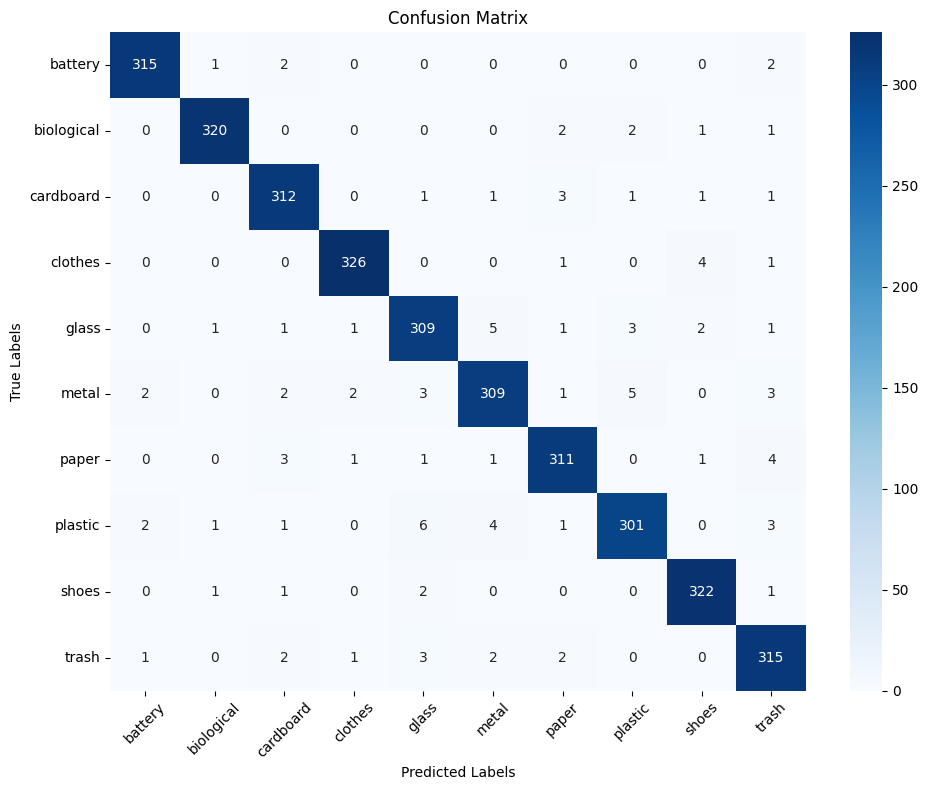

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Hitung confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Saving images.jpg to images.jpg

image 1/1 /content/images.jpg: 224x224 paper 0.63, cardboard 0.35, battery 0.01, trash 0.00, clothes 0.00, 5.2ms
Speed: 4.0ms preprocess, 5.2ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


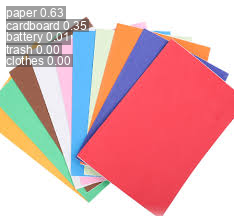


Prediksi utama: paper


In [17]:
from google.colab import files
from ultralytics import YOLO

# Upload gambar
uploaded = files.upload()

# Ambil path gambar
for filename in uploaded.keys():
    image_path = filename

# Load model
model = YOLO('runs/classify/train_balanced/weights/best.pt')

# Prediksi gambar
results = model(image_path)

# Tampilkan hasil prediksi
results[0].show()  # akses elemen pertama dari list dan tampilkan hasil prediksi

# Tampilkan kelas prediksi teratas
top_idx = results[0].probs.top1
top_name = results[0].names[top_idx]
print(f"\nPrediksi utama: {top_name}")

In [18]:
model = YOLO('runs/classify/train_balanced/weights/best.pt')  # load model terbaik
model.save('my_final_model.pt')  # simpan ulang dengan nama yang kamu inginkan

model.export(format='tflite')   # untuk TensorFlow Lite (.tflite)
model.export(format='tfjs')     # untuk TensorFlow.js (.json + bin files)

Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel CPUs. Learn more at https://docs.ultralytics.com/integrations/openvino/
YOLOv8n-cls summary (fused): 30 layers, 1,447,690 parameters, 0 gradients, 3.3 GFLOPs

PyTorch: starting from 'runs/classify/train_balanced/weights/best.pt' with input shape (1, 3, 224, 224) BCHW and output shape(s) (1, 10) (2.8 MB)
requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'ai-edge-litert>=1.2.0', 'onnx>=1.12.0,<1.18.0', 'onnx2tf>=1.26.3', 'onnxslim>=0.1.56', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 10.9s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


TensorFlow SavedModel: starting export with tensorflow 2.18.0...


100%|██████████| 1.11M/1.11M [00:00<00:00, 48.3MB/s]
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /content/calibration_image_sample_data_20x128x128x3_float32.npy...: 100%|██████████| 1/1 [00:00<00:00, 45.64file/s]


ONNX: starting export with onnx 1.17.0 opset 19...


ONNX: slimming with onnxslim 0.1.57...
ONNX: export success ✅ 0.7s, saved as 'runs/classify/train_balanced/weights/best.onnx' (5.5 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.27.10...
Saved artifact at 'runs/classify/train_balanced/weights/best_saved_model'. The following endpoints are available:

* Endpoint 'serving_default'
  inputs_0 (POSITIONAL_ONLY): TensorSpec(shape=(1, 224, 224, 3), dtype=tf.float32, name='images')
Output Type:
  TensorSpec(shape=(1, 10), dtype=tf.float32, name=None)
Captures:
  132446084231824: TensorSpec(shape=(4, 2), dtype=tf.int32, name=None)
  132446084231440: TensorSpec(shape=(3, 3, 3, 16), dtype=tf.float32, name=None)
  132446084232208: TensorSpec(shape=(16,), dtype=tf.float32, name=None)
  132446079435792: TensorSpec(shape=(4, 2), dtype=tf.int32, name=None)
  132446084233936: TensorSpec(shape=(3, 3, 16, 32), dtype=tf.float32, name=None)
  132446079436752: TensorSpec(shape=(32,), dtype=tf.float32, name=None)
  132446084232592: TensorS


TensorFlow.js: starting export with tensorflowjs 4.22.0...

TensorFlow.js: output node names: Identity:0
TensorFlow.js: running 'tensorflowjs_converter --input_format=tf_frozen_model  --output_node_names=Identity:0 "runs/classify/train_balanced/weights/best.pb" "runs/classify/train_balanced/weights/best_web_model"'
TensorFlow.js: export success ✅ 6.4s, saved as 'runs/classify/train_balanced/weights/best_web_model' (5.6 MB)

Export complete (13.4s)
Results saved to /content/runs/classify/train_balanced/weights
Predict:         yolo predict task=classify model=runs/classify/train_balanced/weights/best_web_model imgsz=224  
Validate:        yolo val task=classify model=runs/classify/train_balanced/weights/best_web_model imgsz=224 data=/content/dataset/balanced_dataset  
Visualize:       https://netron.app


'runs/classify/train_balanced/weights/best_web_model'